# Econ 441B Week 8 Assignment
# Richard Grigorian (UID: 505-088-797)

## 0. Import and Clean Data.

In [46]:
# Imports
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [2]:
# Load Data
df = pd.read_csv("bank-additional-full.csv", sep = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Clean Data
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"],
              axis = 1)
df = pd.get_dummies(df,
 columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],
 drop_first = True)

In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

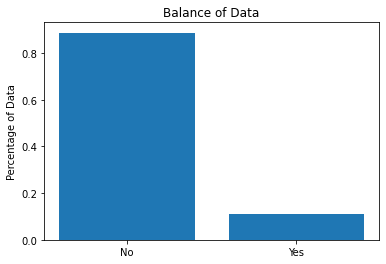

In [9]:
obs = len(y)
plt.bar(["No","Yes"],
        [len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.title("Balance of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 1. Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter.

The visualization above shows a large disbalance between our `no` and `yes` observations. Hence, we look to resampling techniques to mitigate this disbalance. Namely, we will use SMOTE (Synthetic Minority Oversampling Technique) to deal with this problem.

In [11]:
# Application of SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled,
                                        y_train
)

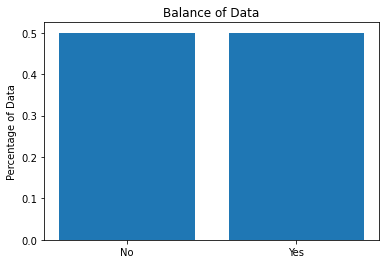

In [12]:
# Check to see if our technique worked
obs = len(y_train)
plt.bar(["No","Yes"],
        [len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.title("Balance of Data")
plt.show()

## 2. Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [13]:
# Decision Tree
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

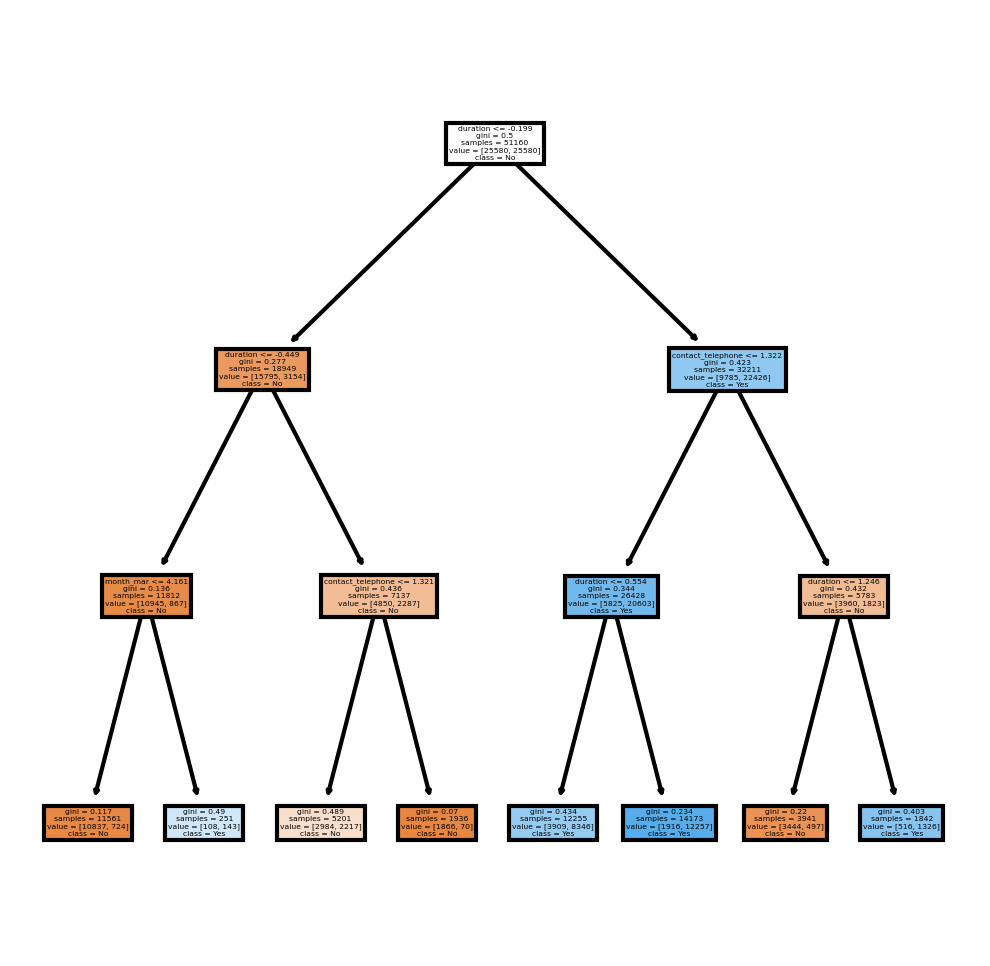

In [14]:
# Plot
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, 
          feature_names = X.columns, 
          class_names=["No","Yes"]
)

fig.savefig('Week8Tree.png')

## 2b. Confusion matrix on out of sample data. Visualize and store as variable.

In [15]:
# Predictions
y_pred = dtree.predict(X_test)
y_true = y_test
# Confusion Matrix
cm_raw = confusion_matrix(y_true, y_pred)

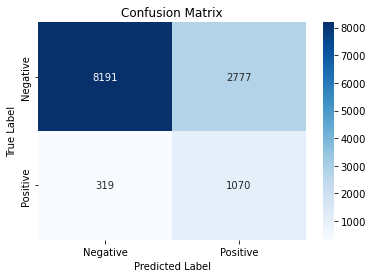

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(
    cm_raw, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_labels, 
    yticklabels=class_labels
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 3. Use bagging on your descision tree.

In [17]:
# Bagging
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(
    base_estimator=dtree, 
    n_estimators=100, 
    max_samples=0.5, 
    max_features=1.
)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7516387472687546


In [18]:
# Prediction
y_pred = bagging.predict(X_test)
y_true = y_test

# Confusion Matrix
cm_bag = confusion_matrix(y_true, y_pred)

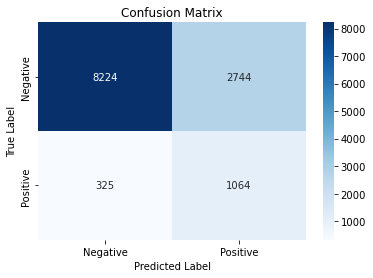

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 4. Boost your tree.

In [24]:
# Boosting
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(
    base_estimator=dtree, 
    n_estimators=50, 
    learning_rate=0.1
)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Prediction
y_pred = adaboost.predict(X_test)
y_true = y_test

# Confusion Matrix
cm_boost = confusion_matrix(y_true, y_pred)

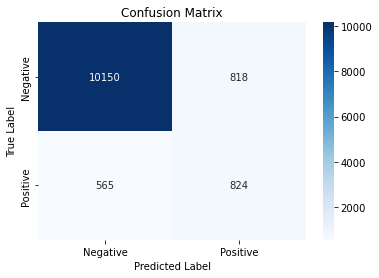

In [26]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 5. Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [27]:
# Classifier Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Import
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [47]:
# 5 Different Base Learners
logistic = LogisticRegression(
    penalty = 'l2',
)
randomforest = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'gini',
)
svc = SVC(
    C = 1.0,
    kernel = 'rbf', # Radial Bias Function
)
neuralnet = MLPClassifier(
    hidden_layer_sizes=(5,5,),
    activation = 'logistic',
    solver = 'adam',
)
knn = KNeighborsClassifier(
    n_neighbors = 5,
)

base_estimators = [
    logistic,
    randomforest,
    svc,
    neuralnet,
    knn
]

# Super Learner
super_learner = SuperLearner()
super_learner.add(base_estimators)

# Fit to Training Data
super_learner.fit(X_scaled, y_train)

# Get base_predictions
base_predictions = super_learner.predict(X_scaled)

In [48]:
# Train your Meta Learner
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)

In [49]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[-4.10908302, -2.95259317, -3.40322693, 18.67366946, -1.16789206]])

In [50]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX

test_predictions = super_learner.predict(X_test)

y_pred = log_reg.predict(test_predictions)
y_true = y_test

# Confusion Matrix
cm_super = confusion_matrix(y_true, y_pred)

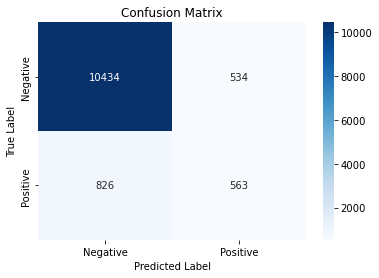

In [51]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Coefficient Interpretation

Notice from the above printout, our coefficients for our models in our Logistic Super Learner are:

| Logistic | Random Forest | Support Vector | Neural Network | KNN |
| :---: | :---: | :---: | :---: | :---: |
| -4.109 | -2.953 | -3.403 | 18.674 | -1.168 |

From the table, we see that the only model with a positive coefficient is our simple 5 layer 5 node Neural Network (2 layer, 5 node). In particular, this coefficient is both positive and of much larger magnitude than the rest of the coefficients. The super learner implies that if our Neural Network predicts a `positive` (1) outcome then the Super Learner is very likely to output a `positive`. We see that for our other models, the coefficient is negative which implies that if those models predict `positive` our super learner is more likely to predict `negative`. A (1) from those models leads us to believe that the true value is actually (0).

## 6. Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample).

In [52]:
# Function to get sensitivity & specificity

def get_sens_specf(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel() # returns array of cm entries
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

In [53]:
# Applciation of Function on our Confusion Matrices
raw_sens, raw_specf = get_sens_specf(cm_raw)
bag_sens, bag_specf = get_sens_specf(cm_bag)
boost_sens, boost_specf = get_sens_specf(cm_boost)
super_sens, super_specf = get_sens_specf(cm_super)

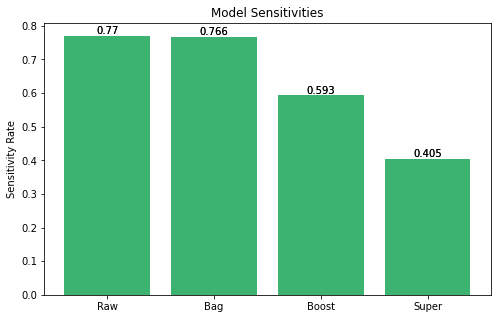

In [54]:
# Sensitivity Bar Graph
sens = np.round([raw_sens, bag_sens, boost_sens, super_sens], 3)
indexes = ["Raw", "Bag", "Boost", "Super"]
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(indexes, sens, color='mediumseagreen')
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Model Sensitivities")
plt.ylabel("Sensitivity Rate")
plt.show()

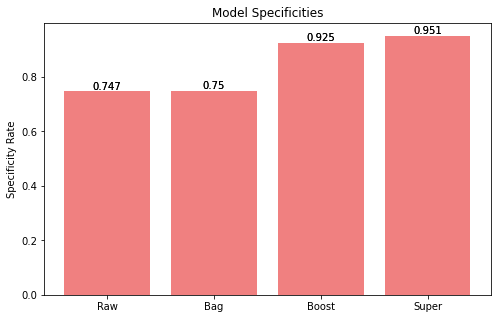

In [55]:
# Specificity Bar Graph
specf = np.round([raw_specf, bag_specf, boost_specf, super_specf], 3)
indexes = ["Raw", "Bag", "Boost", "Super"]
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(indexes, specf, color='lightcoral')
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Model Specificities")
plt.ylabel("Specificity Rate")
plt.show()